In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('data/cleaned_BA_reviews.csv', index_col=0)
df.head()

,Reviews,Country,Recommended,Rating,Corpus
0,This flight was one of the worst I have ever ...,United Kingdom,no,2,flight one worst ever life wanted pamper bough...
1,It seems that there is a race to the bottom am...,United States,no,3,seems race bottom amongst airline cannot even ...
2,As a Spanish born individual living in Englan...,United Kingdom,no,2,spanish born individual living england using b...
3,"A rather empty and quiet flight to Tel Aviv, ...",United Kingdom,yes,9,rather empty quiet flight tel aviv friendly ca...
4,Easy check in and staff member was polite and...,United Kingdom,yes,9,easy check staff member polite helpful made sp...


In [3]:
country_count = df['Country'].value_counts()
top_countries = country_count[:5]

Text(0.5, 1.0, 'No. of reviews by Country')

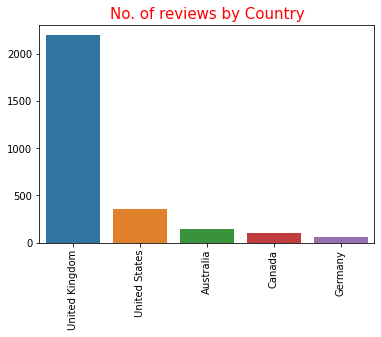

In [4]:
ax = sns.barplot(x= top_countries.index, y= top_countries.values)

plt.xticks(rotation='vertical')
ax.set_title('No. of reviews by Country', fontsize=15, color= 'red')

In [5]:
ratings_count = df['Rating'].value_counts()

ratings_count = ratings_count.sort_index()
ratings_count

1     752
2     392
3     385
4     237
5     228
6     186
7     305
8     356
9     299
10    315
Name: Rating, dtype: int64

Text(0, 0.5, 'Count of each rating')

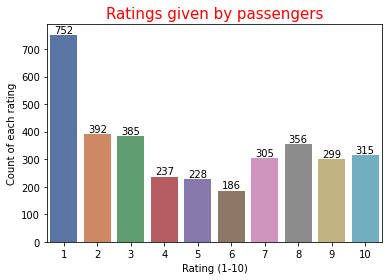

In [6]:
ax = sns.barplot(x= ratings_count.index, y= ratings_count.values, palette='deep')
ax.bar_label(ax.containers[0])

ax.set_title('Ratings given by passengers', fontsize=15, color= 'red')
ax.set_xlabel('Rating (1-10)')
ax.set_ylabel('Count of each rating')

### BA Recommend ratio

In [7]:
recommend_count = df['Recommended'].value_counts()
recommend_count

no     2011
yes    1444
Name: Recommended, dtype: int64

Text(0.5, 1.0, 'Recommendation Ratio')

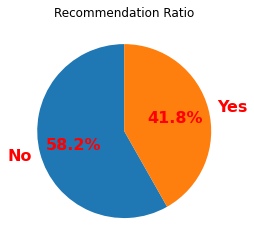

In [8]:
plt.pie(recommend_count, labels=['No', 'Yes'], radius=1, autopct='%0.1f%%',
         textprops={'color':"red", 'weight':"bold", 'size':16} ,startangle=90)

plt.title("Recommendation Ratio")

### Word Cloud of Reviews

In [9]:
corpus = ' '.join(df['Corpus'])

stopwords = set(STOPWORDS)

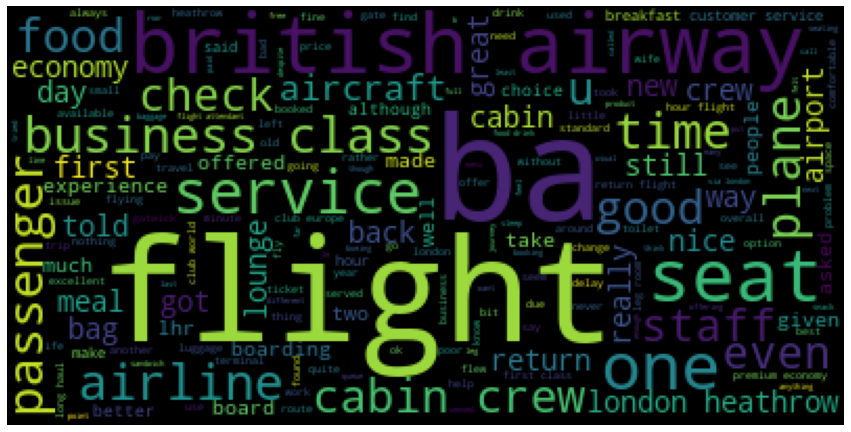

In [10]:
wordcloud = WordCloud(max_words=300, stopwords=stopwords).generate(corpus)

# plot the WordCloud image                      
plt.figure(figsize = (15, 8))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

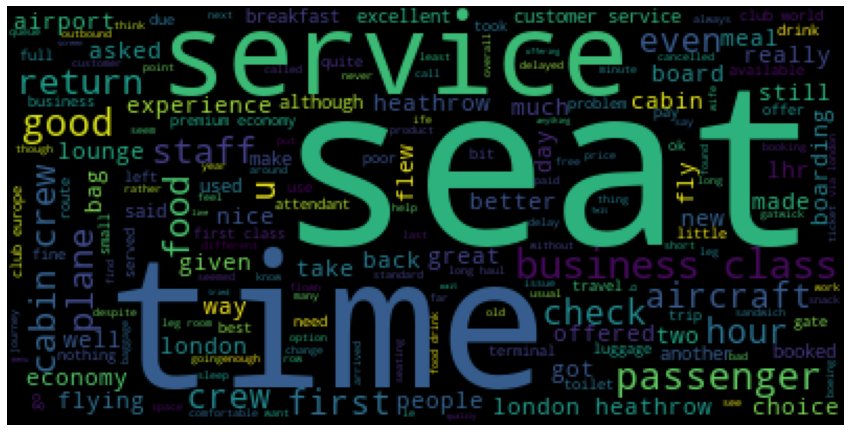

In [11]:
stopwords.update(["ba","flight", "british","airway", 'airline', 'one', 'told'])
wordcloud = WordCloud(max_words=300, stopwords=stopwords).generate(corpus)

# plot the WordCloud image      
plt.figure(figsize = (15, 8))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()